---
layout: default
categories: linearRegression
title: "Linear Regression - Implementation"
permalink: /ML4.5/
order: 4.5
comments: true
---

In [1]:
%pylab --no-import-all inline
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Linear regression implementation
Since linear regression is a trivial model, it is relatively easy to implement it from scratches and maybe in the future I'll implement a full version on this page. 

Many libraries enabling a user to build and train a linear regression model exist. In the last years I feel like `scikit-learn` and `pytorch` are the most widely used libraries in machine learning.

## Preparing data
For this example we are using house prices as a function of inhabitable surface and number of rooms. In order to prepare data we use `pandas`. 

In [2]:
import pandas as pd

We read data from a `csv` file and cast it into a `pandas.DataFrame`

In [3]:
df = pd.read_csv('./data/house_pricing.csv')
df.head()

,sqf,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


This dataset has two feature columns (`sqf` and `rooms`) and a label column (`price`)

Let's assign the features $X$ and the labels $y$ to two different variables

In [4]:
xy = df.values.T
X = xy[:-1].T
y = xy[-1]

Where the features $X$ are

In [5]:
X[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

and their labels $y$

In [6]:
y[:5].reshape(-1, 1)

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900]])

## scikit-learn
Linear regression in `scikit-learn` is as easy as one line of code

### Single feature
In order for the linear dependency to be intuitively visualizable, we are going for now to drop the `rooms` column from the features

In [7]:
X_simple = X[:, 0]
X_simple

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203])

Since the `fit()` function that we are using later wants a 2D-vector of shape $(m, n)$  and we only have one feature, we need to reshape the array in the form $(m, 1)$. On the other hand $y$ can either be a 2D or 1D array.

In [75]:
X_simple = X_simple.reshape(-1, 1)
X_simple[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

Building a linear regression model with [scikit-learn](https://scikit-learn.org/) requires the `LinearRegression` class

In [9]:
from sklearn.linear_model import LinearRegression

Now we can build the model buy instantiating the `LinearRegression` class

In [10]:
linreg = LinearRegression()

the `linreg` variable contains a linear regression object that allow the computation of the model, but we didn't feed the data to it. Data is fed to the `.fit()` method

In [11]:
linreg = linreg.fit(X_simple, y)

The parameters and bias of the model are returned with

In [12]:
linreg.coef_, linreg.intercept_

(array([134.52528772]), 71270.49244872917)

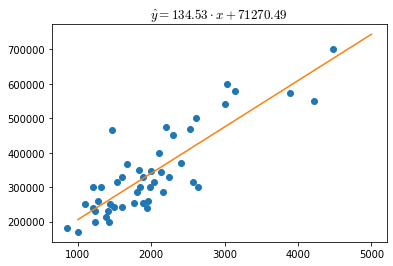

In [24]:
fig, ax = plt.subplots()
ax.plot(X_simple, y, ls='none', marker='o')
px = np.linspace(1000, 5000)
ax.plot(px, linreg.predict(px.reshape(-1, 1)))
ax.set_title(f'$\\hat{{y}}={linreg.coef_[0]:.2f} \cdot x '
             f'+ {linreg.intercept_:.2f}$', fontsize=13);

### Multiple Features
We can now repeat the fit for the original feature matrix $X$

In [40]:
from IPython.display import Math

linreg = LinearRegression().fit(X, y)

Since this time $X \in \mathbb{R}^{m \times 2}$, we have two weight parameters and one bias parameter

In [41]:
linreg.coef_, linreg.intercept_

(array([  139.21067402, -8738.01911233]), 89597.90954279754)

## Pytorch

In [42]:
import torch
from torch.autograd import Variable

In [54]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        return self.linear(x)

In [55]:
model = linearRegression(2, 1)

In [86]:
epochs = 100
alpha = 0.01
loss_func = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=alpha)

In [90]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(X.astype(np.float32)))
    labels = Variable(torch.from_numpy(y.reshape(-1, 1).astype(np.float32)))
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optim.zero_grad()
    # get output from the model, given the inputs
    outputs = model(inputs)
    # get loss for the predicted output
    loss = loss_func(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()
    # update parameters
    optim.step()
#     print('epoch {}, loss {}'.format(epoch, loss.item()))